In [1]:
from sklearn.datasets import make_multilabel_classification # 导入样本生成器
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree # 导入决策树
import matplotlib.pyplot as plt

In [2]:
n_samples = 100000 # 100000个数据
n_features = 100 # 100个特征
n_classes = 1 # 分两类 [0 1]两类
MAX_depth = 15 # 递归树最大的深度

In [3]:
# n_samples = 100

In [4]:
# 生成数据
X,y = make_multilabel_classification(n_samples=n_samples,n_features=n_features,n_classes=n_classes)
X = X%2 # 得到的特征值为0或1
print('X = ', X, X.shape)
print('y = ', y, y.shape)

X =  [[0. 1. 0. ... 0. 0. 1.]
 [0. 1. 1. ... 0. 0. 1.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]] (100000, 100)
y =  [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]] (100000, 1)


In [5]:
# 将原始数据按照比例分割为“测试集”和“训练集，test_size = 0.2就是20%为测试集
X_train,X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=22)

In [6]:
Test_score = []
Train_score = []
for i in range(1,MAX_depth+1):
    max_depth = i
    clf = tree.DecisionTreeClassifier(max_depth=max_depth)
    clf = clf.fit(X_train,y_train)
    test_score = clf.score(X_test,y_test)
    train_socre = clf.score(X_train,y_train)
    Test_score.append(test_score)
    Train_score.append(train_socre)
    print('决策树深度 max depth = {:2}\t\t测试准确率 = {:.2f}%\t\t\t 训练准确率 = {:.2f}%'.format(i,test_score*100,train_socre*100))

决策树深度 max depth =  1		测试准确率 = 76.85%			 训练准确率 = 76.75%
决策树深度 max depth =  2		测试准确率 = 83.44%			 训练准确率 = 83.35%
决策树深度 max depth =  3		测试准确率 = 86.46%			 训练准确率 = 86.89%
决策树深度 max depth =  4		测试准确率 = 86.98%			 训练准确率 = 87.65%
决策树深度 max depth =  5		测试准确率 = 87.35%			 训练准确率 = 87.87%
决策树深度 max depth =  6		测试准确率 = 88.52%			 训练准确率 = 89.08%
决策树深度 max depth =  7		测试准确率 = 89.79%			 训练准确率 = 90.35%
决策树深度 max depth =  8		测试准确率 = 90.79%			 训练准确率 = 91.40%
决策树深度 max depth =  9		测试准确率 = 91.44%			 训练准确率 = 92.01%
决策树深度 max depth = 10		测试准确率 = 91.56%			 训练准确率 = 92.35%
决策树深度 max depth = 11		测试准确率 = 91.63%			 训练准确率 = 93.13%
决策树深度 max depth = 12		测试准确率 = 91.94%			 训练准确率 = 94.03%
决策树深度 max depth = 13		测试准确率 = 91.89%			 训练准确率 = 94.90%
决策树深度 max depth = 14		测试准确率 = 92.00%			 训练准确率 = 95.73%
决策树深度 max depth = 15		测试准确率 = 92.04%			 训练准确率 = 96.56%


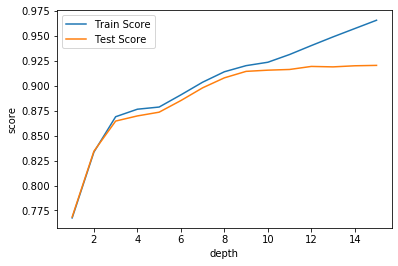

In [7]:
plt.plot(range(1,MAX_depth + 1),Train_score,label = 'Train Score')
plt.plot(range(1,MAX_depth + 1),Test_score,label = 'Test Score')
plt.xlabel('depth')
plt.ylabel('score')
plt.legend(loc = 'best')
plt.show()

In [8]:
clf = tree.DecisionTreeClassifier(max_depth=15)
clf = clf.fit(X_train,y_train)
predicted = clf.predict(X_train)

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_train,predicted))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95     26694
           1       0.96      0.99      0.97     53306

    accuracy                           0.97     80000
   macro avg       0.97      0.95      0.96     80000
weighted avg       0.97      0.97      0.97     80000



In [10]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_train,predicted)#或者直接使用clf.score
print('accuracy_score:',acc)

accuracy_score: 0.9655875


In [11]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(clf,X_train,y_train,cv=10)
acc

array([0.921375, 0.9275  , 0.92875 , 0.92025 , 0.9175  , 0.920375,
       0.923375, 0.91525 , 0.923125, 0.920375])

In [12]:
feature_names = np.array(range(0,100))
class_names = np.array(['0','1'])

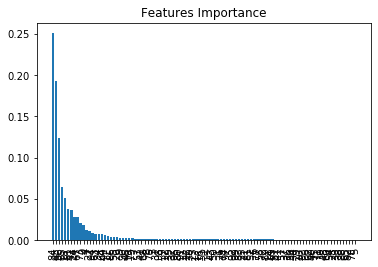

In [13]:
importances = clf.feature_importances_
names = feature_names
plt.title('Features Importance')
plt.bar(range(0,len(names)),importances[importances.argsort()[::-1]])
plt.xticks(range(0,len(names)),names[importances.argsort()[::-1]],rotation=90)
plt.show()

In [14]:
import graphviz

In [15]:
graphviz.__version__

'0.16'

[Text(294.28374326508623, 210.645, 'X[84] <= 0.5\ngini = 0.445\nsamples = 80000\nvalue = [26694, 53306]'),
 Text(256.90260584088253, 197.055, 'X[45] <= 0.5\ngini = 0.382\nsamples = 71467\nvalue = [18379, 53088]'),
 Text(211.62951554281125, 183.465, 'X[96] <= 0.5\ngini = 0.31\nsamples = 64897\nvalue = [12455, 52442]'),
 Text(165.53940550116891, 169.875, 'X[85] <= 0.5\ngini = 0.244\nsamples = 59796\nvalue = [8487, 51309]'),
 Text(118.2231925774401, 156.285, 'X[18] <= 0.5\ngini = 0.189\nsamples = 55050\nvalue = [5813, 49237]'),
 Text(80.36374050263005, 142.695, 'X[42] <= 0.5\ngini = 0.144\nsamples = 51137\nvalue = [3981, 47156]'),
 Text(52.06301431911164, 129.10500000000002, 'X[61] <= 0.5\ngini = 0.106\nsamples = 47501\nvalue = [2676, 44825]'),
 Text(32.33774693161894, 115.515, 'X[24] <= 0.5\ngini = 0.078\nsamples = 44360\nvalue = [1812, 42548]'),
 Text(18.461940385739336, 101.925, 'X[67] <= 0.5\ngini = 0.058\nsamples = 41056\nvalue = [1227, 39829]'),
 Text(9.959859731151374, 88.335000000

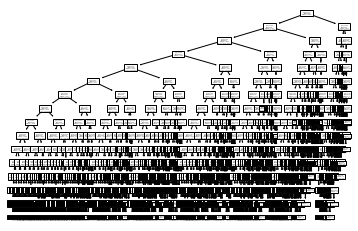

In [16]:
data = tree.export_graphviz(clf, out_file='tree.dot')
# graph = graphviz.Source(data)
tree.plot_tree(clf)

In [ ]:
import pydotplus
with open('tree.dot', 'w') as f:
    dot_data = tree.export_graphviz(clf, out_file=None)
    f.write(dot_data)

# 生成pdf文件
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=feature_names,class_names=class_names,  
                                filled=True, rounded=True, special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data)
 
## 保存图像到pdf文件
graph.write_pdf("tree.pdf")

In [ ]:
graph.write_png('tree.png') # png文件
graph.write_fig('tree.fig') # fig文件
graph.write_jpeg('tree.jpeg') # jpeg文件
graph.write_jpg('tree.jpg') # jpg文件